In [0]:
!git clone https://github.com/ammu11/DS19-DamageCarClassification

Cloning into 'DS19-DamageCarClassification'...
remote: Enumerating objects: 1790, done.
remote: Total 1790 (delta 0), reused 0 (delta 0), pack-reused 1790
Receiving objects: 100% (1790/1790), 184.24 MiB | 34.72 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (1704/1704), done.


In [0]:
import keras
import os
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras import regularizers
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
import os.path as osp
import argparse
import tensorflow as tf
from keras.models import load_model

Using TensorFlow backend.


In [0]:
train_dir = "/content/DS19-DamageCarClassification/training"
test_dir = "/content/DS19-DamageCarClassification/testing"

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x=Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
preds=Dense(3,activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x) 

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '







17227776/17225924 [==============================] - 1s 0us/step


In [0]:
model=Model(inputs=base_model.input,outputs=preds)

In [0]:
for layer in model.layers[:20]:
  layer.trainable=False
for layer in model.layers[20:]:
  layer.trainable=True

In [0]:
img_width, img_height = 224, 224
epochs = 200
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1366 images belonging to 3 classes.
Found 336 images belonging to 3 classes.


In [0]:
savepath = os.path.join( ""+ 'checkpoint-{epoch:03d}.h5' )
checkpointer = ModelCheckpoint(filepath=savepath,monitor='val_acc', mode='max', verbose=0, save_best_only=True)

In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size,
        callbacks=[checkpointer])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
18/42 [===========>..................] - ETA: 16s - loss: 2.6544 - acc: 0.6679

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


42/42 [==============================] - 18s 428ms/step - loss: 2.1909 - acc: 0.7870 - val_loss: 3.5860 - val_acc: 0.5781
Epoch 2/200
42/42 [==============================] - 12s 297ms/step - loss: 1.4499 - acc: 0.9416 - val_loss: 2.1097 - val_acc: 0.8059
Epoch 3/200
42/42 [==============================] - 12s 283ms/step - loss: 1.2379 - acc: 0.9353 - val_loss: 2.1219 - val_acc: 0.7928
Epoch 4/200
42/42 [==============================] - 12s 292ms/step - loss: 0.9910 - acc: 0.9692 - val_loss: 1.7288 - val_acc: 0.8059
Epoch 5/200
42/42 [==============================] - 12s 287ms/step - loss: 0.8190 - acc: 0.9799 - val_loss: 2.7462 - val_acc: 0.7138
Epoch 6/200
42/42 [==============================] - 12s 284ms/step - loss: 0.7760 - acc: 0.9562 - val_loss: 1.3138 - val_acc: 0.7829
Epoch 7/200
42/42 [==============================] - 11s 272ms/step - loss: 0.6125 - acc: 0.9785 - val_loss: 1.0688 - val_acc: 0.8125
Epoch 8/200
42/42 [==============================] - 11s 265ms/step - loss

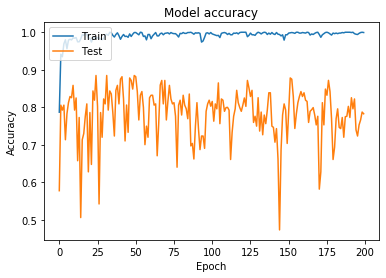

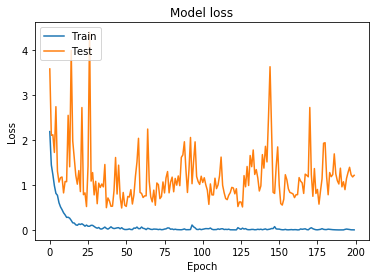

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.save_weights("model.h5")

In [0]:
saved_model="/content/DS19-DamageCarClassification/path_to_the_last_checkpoint_file.h5"
# (or)
#Access the last checkpoint file as final model
saved_model="/content/checkpoint-025.h5"

In [0]:
def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return preds[0]..

labels = ("Bumper_Damage","Door_Damage","Glass_Damage")
model = load_model(saved_model)
img = image.load_img('/content/DS19-DamageCarClassification/testing/bumper/0048.JPEG', target_size=(224,224))
preds = predict(model, img)
j=max(preds)
result = np.where(preds == j)
index_val = result[0][0]
prediction = labels[index_val]
print("Result:",prediction)

Result: Bumper_Damage
